In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("./Bank customers.csv")
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [5]:
def ref1(x):
    if x == 'M':
        return 1
    else:
        return 0

df['Gender'] = df['Gender'].map(ref1)

In [6]:
def ref2(x):
    if x == 'Existing Customer':
        return 1
    else:
        return 0

df['Attrition_Flag'] = df['Attrition_Flag'].map(ref1)

In [8]:
y = df['Card_Category']
X = df.copy()
X.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [9]:
X['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder

def label_encoded(feat):
    le = LabelEncoder()
    le.fit(feat)
    print(feat.name,le.classes_)
    return le.transform(feat)

In [11]:
X['Income_Category'] = label_encoded(X['Income_Category'])
X['Education_Level'] = label_encoded(X['Education_Level'])
X['Marital_Status'] = label_encoded(X['Marital_Status'])

Income_Category ['$120K +' '$40K - $60K' '$60K - $80K' '$80K - $120K' 'Less than $40K'
 'Unknown']
Education_Level ['College' 'Doctorate' 'Graduate' 'High School' 'Post-Graduate'
 'Uneducated' 'Unknown']
Marital_Status ['Divorced' 'Married' 'Single' 'Unknown']


In [12]:
X.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,3,1,2,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,2,2,4,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,2,1,3,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000


In [14]:
X.describe()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.0,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.0,46.325960,0.470919,2.346203,3.096574,1.463415,2.863928,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,0.0,8.016814,0.499178,1.298908,1.834812,0.737808,1.504700,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,0.0,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,0.0,41.000000,0.000000,1.000000,2.000000,1.000000,2.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,0.0,46.000000,0.000000,2.000000,3.000000,1.000000,3.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,0.0,52.000000,1.000000,3.000000,5.000000,2.000000,4.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,0.0,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [15]:
X = X.drop(['CLIENTNUM','Card_Category'],axis=1)

In [16]:
X.shape

(10127, 19)

In [17]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.2)

In [18]:
Xtrain.shape

(8101, 19)

In [19]:
Xtest.shape

(2026, 19)

In [20]:
ytrain.shape

(8101,)

In [21]:
ytest.shape

(2026,)

# logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(Xtrain,ytrain)
ypred = model.predict(Xtest)

C:\Users\RAHUL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
ypred

array(['Blue', 'Blue', 'Blue', ..., 'Blue', 'Blue', 'Blue'], dtype=object)

In [27]:
ytest

479     Blue
4135    Blue
4942    Blue
6358    Blue
922     Blue
        ... 
2009    Blue
2578    Blue
1003    Blue
5036    Blue
8630    Blue
Name: Card_Category, Length: 2026, dtype: object

In [28]:
from sklearn.metrics import accuracy_score
lr = accuracy_score(ytest,ypred)
lr*100

92.79368213228035

In [29]:
from sklearn.model_selection import cross_val_score
modelcv = LogisticRegression()
scores = cross_val_score(modelcv,X,y,cv=10,scoring='accuracy')
scores.mean()

C:\Users\RAHUL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\RAHUL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.9005423564803795

# RandomForestClassifier 

In [32]:
# Initialize model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(Xtrain, ytrain)

# Predict
y_pred = rf_model.predict(Xtest)

In [33]:
y_pred

array(['Blue', 'Blue', 'Blue', ..., 'Blue', 'Blue', 'Blue'], dtype=object)

In [34]:
ytest

479     Blue
4135    Blue
4942    Blue
6358    Blue
922     Blue
        ... 
2009    Blue
2578    Blue
1003    Blue
5036    Blue
8630    Blue
Name: Card_Category, Length: 2026, dtype: object

In [35]:
rf = accuracy_score(ytest,y_pred)
rf*100

95.85389930898322

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Classification Report:\n", classification_report(ytest, y_pred))


Classification Report:
               precision    recall  f1-score   support

        Blue       0.98      0.99      0.98      1879
        Gold       0.43      0.11      0.18        27
    Platinum       0.00      0.00      0.00         6
      Silver       0.69      0.64      0.66       114

    accuracy                           0.96      2026
   macro avg       0.52      0.44      0.46      2026
weighted avg       0.95      0.96      0.95      2026



C:\Users\RAHUL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RAHUL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\RAHUL\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


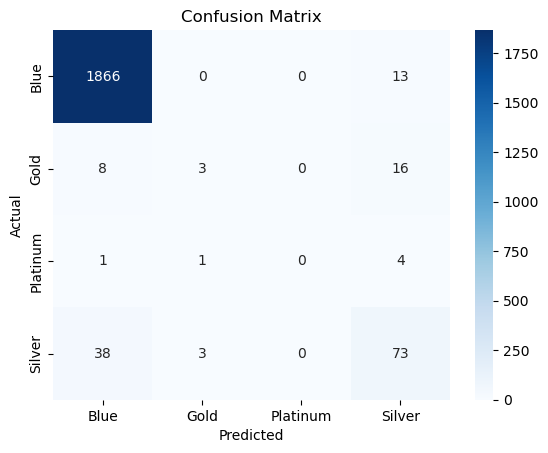

In [38]:
# Confusion matrix
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [40]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(Xtrain, ytrain)
dr = accuracy_score(ytest,y_pred)
dr*100

95.85389930898322

In [45]:
# SVM
from sklearn.svm import SVC
svm = SVC()
svm.fit(Xtrain, ytrain)

svr = accuracy_score(ytest,y_pred)
svr*100

95.85389930898322

In [46]:
import pandas as pd

# Create dictionary with model names and accuracies
model_acc = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM'],
    'Accuracy (%)': [92.79368213228035, 95.85389930898322, 95.85389930898322, 95.85389930898322]
}

# Convert dictionary to DataFrame
df_model_acc = pd.DataFrame(model_acc)

# Show the DataFrame
print(df_model_acc)


                 Model  Accuracy (%)
0  Logistic Regression     92.793682
1        Random Forest     95.853899
2        Decision Tree     95.853899
3                  SVM     95.853899


In [47]:
import pickle


In [48]:
# Save the model
with open('random_forest_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

print("Model saved as random_forest_model.pkl")


Model saved as random_forest_model.pkl


In [49]:
# Load the model
with open('random_forest_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Use it for predictions
y_pred_loaded = loaded_model.predict(Xtest)
